# Simulation of standard Snakes and ladders Game
## This program is used to simulate snakes and ladder game to find the average length of the game
** Author: Edwin Ismail **

In [1]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import more_itertools
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# initializing size of the dance
dice = 6


*** snakes and ladders for the game for a snake element [[0]] < element [[1]] and for a ladder element [[0]] < element [[1]] ***

In [2]:
snakes_ladders = [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100], [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],
                  [64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]
#only laddder
#snakes_ladders= [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100]]
#only snakes            
#snakes_ladders=[ [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],[64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]

*** random snake and ladder generator ***


In [3]:
def RandomSnake(numSnake, numLadder):
    randomSnake = []
    countSnake = 0
    countLadder = 0
    s_l_set = set()
    s_l_set.update([])
    while len(randomSnake) < (numSnake+numLadder) :
        x = random.randint(1, 100)
        y = random.randint(1, 100)
        if y > x and countSnake < (numSnake) and y != 100:
            if not y in s_l_set and  not x in s_l_set:
                randomSnake.append([y, x])
                countSnake += 1
        if y < x and countLadder < (numLadder):
            if not y in s_l_set and not x in s_l_set:
                randomSnake.append([y, x])
                countLadder += 1
        for ele in randomSnake:
            s_l_set.update(ele)
    # just verifying if snakes and ladders are unique
    """df=pd.DataFrame(list(s_l_set),columns=['just'])
    print(df['just'].value_counts())"""
    return randomSnake

*** Function for the simulation of the game snakes and ladders ***


In [4]:
def gamesimulation(sl, dice):
    # initialization of parameters count for counting the length of game, path records the step of the game to  completion, token is actual element moving through the game
    count = 0
    path = []
    token = 0
    while token < 100:
        roll = random.randint(1, dice)
        token = token+roll
        count += 1
        if token > 100:
            token = token-roll
        for trans in sl:
            if token == trans[0]:
                token = trans[1]
                break
        path.append(token)
    return [count, path]

## Simulation of the game


*** Function for commanding how many times the game should be played***

In [5]:
def NumberOfGame(number,snakes):
    countlist = []
    for num in range(0, number):
        countlist.append(gamesimulation(snakes, dice))
    return countlist

*** this will randomize *** (** from original set ** ) *** the snakes and ladder in each iteration of the simulation of the game ***

In [6]:
def NumberOfGame2(number,snakes):
    countlist = []
    for num in range(0, number):
        countlist.append(gamesimulation(snakes(), dice))
    return countlist

*** this will randomize snakes and ladders in each iteration of the simulation of the game ,however the snake and ladder are randomized not from original set ***

In [7]:
def NumberOfGame3(number):
    countlist = []
    for num in range(0, number):
        countlist.append(gamesimulation(RandomSnake(10,9), dice))
    return countlist

*** Function is to presenting the result of the game ***

In [8]:
def results(countlist):
    print("The minimum lenght of the game is {} \n the shortest path is {}".format(
        (min(countlist))[0], (min(countlist))[1]))
    print("The maximum lenght of the game is {} \n the longest path is {}".format(
        (max(countlist))[0], (max(countlist))[1]))
    sums = 0
    for ele in countlist:
        sums += ele[0]
    print("Average length of the game is {}".format(sums/len(countlist)))
    return countlist

In [9]:
#average  length of game 
def average(countlist):
    sums = 0
    for ele in countlist:
        sums += ele[0]
    return sums/len(countlist)

In [10]:
#playing 100000 games with original set of snake and ladders
countlist=results(NumberOfGame(100000,snakes_ladders))

The minimum lenght of the game is 7 
 the shortest path is [14, 17, 22, 84, 88, 94, 100]
The maximum lenght of the game is 284 
 the longest path is [3, 14, 6, 12, 18, 19, 20, 22, 84, 24, 25, 30, 35, 44, 46, 50, 52, 58, 60, 63, 69, 73, 77, 79, 82, 86, 90, 75, 81, 24, 30, 31, 37, 39, 40, 42, 46, 11, 13, 15, 20, 23, 26, 29, 32, 33, 38, 39, 42, 43, 45, 50, 67, 68, 72, 77, 82, 84, 89, 73, 79, 84, 89, 75, 76, 82, 84, 89, 73, 76, 77, 78, 83, 84, 89, 75, 78, 83, 24, 30, 35, 44, 26, 31, 44, 46, 26, 31, 37, 43, 26, 30, 33, 35, 40, 41, 46, 52, 58, 60, 65, 66, 67, 70, 76, 82, 88, 89, 75, 78, 84, 89, 73, 78, 82, 84, 88, 92, 78, 84, 89, 90, 75, 77, 78, 83, 89, 91, 75, 76, 78, 81, 24, 27, 31, 32, 37, 38, 43, 11, 14, 19, 22, 26, 29, 30, 33, 34, 40, 45, 26, 84, 86, 90, 92, 73, 76, 79, 83, 85, 88, 89, 75, 76, 81, 83, 24, 29, 33, 35, 39, 40, 46, 48, 11, 6, 31, 33, 34, 38, 43, 26, 29, 35, 39, 43, 45, 26, 30, 44, 26, 84, 88, 92, 75, 78, 81, 85, 86, 88, 89, 73, 75, 79, 85, 91, 73, 78, 83, 86, 89, 92, 75, 8

*** converting a list to numpy array for ease graph plotting ***

In [11]:
countList=np.array(countlist)

In [12]:
#reshaping array to the shape (100000,)
countList=countList[:,:-1].reshape(100000,)

(0.0, 284.0)

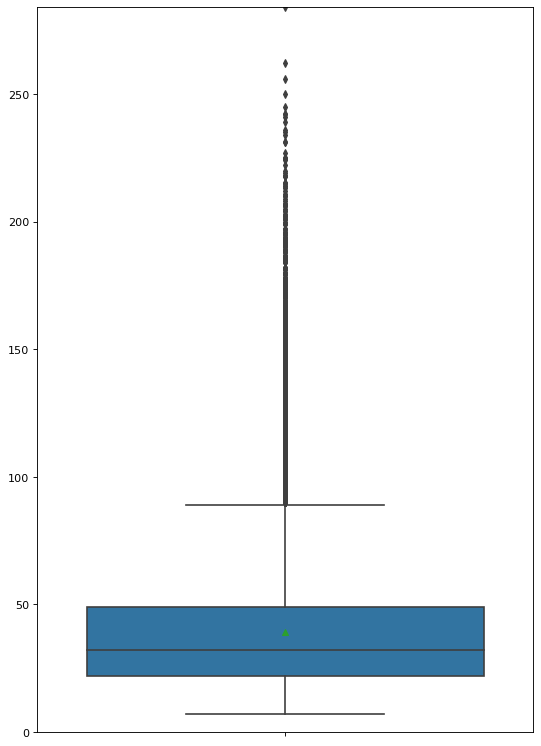

In [13]:
#plotbox 
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,(max(countlist))[0])

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

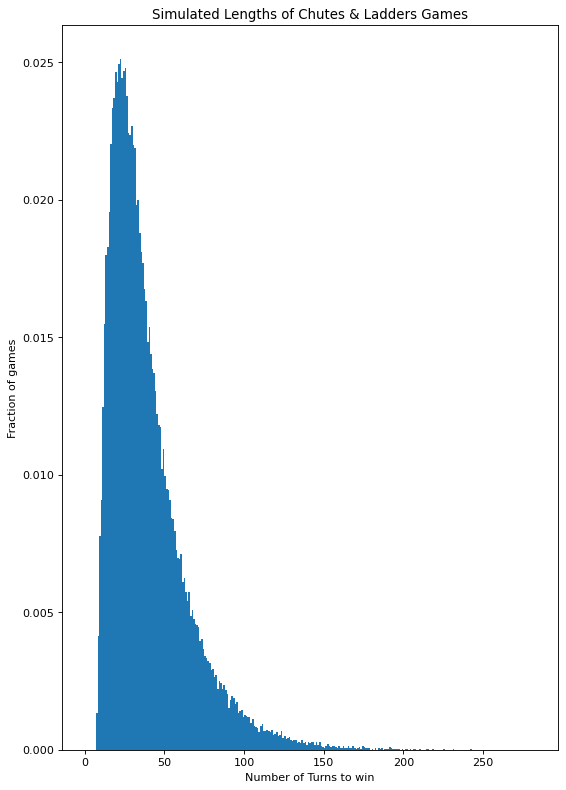

In [14]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range((max(countlist))[0]),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [15]:
df=pd.DataFrame(data=countList,columns=["number of turns"])
df["number of turns"].value_counts()

22     2509
21     2494
25     2478
24     2466
19     2463
       ... 
211       1
209       1
208       1
200       1
284       1
Name: number of turns, Length: 226, dtype: int64

### Random snakes and ladder creation, and distribution   

In [16]:
result=[]
for i in range(0,100000):
    result.append(RandomSnake(10,9))

In [17]:
result=np.array(result)
result=result.reshape(3800000)


*** shows distribution of random snake and ladder ***

Text(0.5, 1.0, 'distribution of the random snake and ladders')

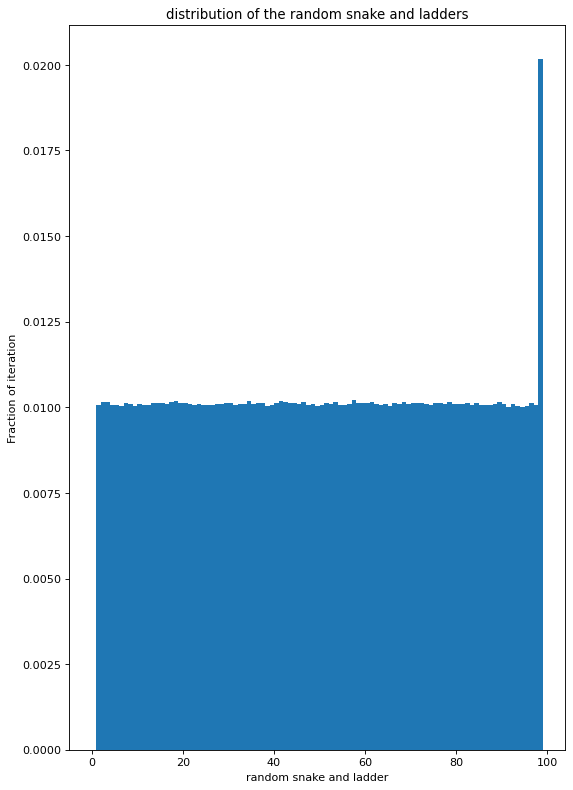

In [18]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(result,bins=range((max(result))),density=True)
plt.xlabel('random snake and ladder')
plt.ylabel('Fraction of iteration')
plt.title('distribution of the random snake and ladders')

In [19]:
countlist = results(NumberOfGame3(14000))
with open('game_random_snake', 'wb') as fp:
    pickle.dump(countlist, fp)

, 66, 78, 18, 21, 24, 26, 28, 34, 49, 2, 7, 9, 15, 18, 21, 26, 28, 60, 65, 70, 75, 78, 18, 22, 27, 32, 35, 36, 37, 42, 52, 53, 54, 2, 6, 10, 14, 15, 18, 22, 26, 28, 32, 33, 39, 69, 73, 74, 77, 80, 83, 85, 90, 92, 23, 26, 30, 34, 39, 45, 50, 54, 57, 61, 37, 41, 45, 48, 85, 91, 14, 19, 23, 25, 60, 64, 69, 73, 74, 77, 81, 86, 89, 90, 23, 28, 32, 34, 40, 69, 72, 77, 78, 18, 22, 27, 32, 35, 36, 41, 43, 69, 74, 76, 8, 10, 16, 18, 22, 23, 27, 32, 34, 36, 49, 52, 53, 57, 37, 43, 69, 72, 74, 78, 80, 83, 85, 89, 92, 98, 33, 34, 49, 85, 89, 91, 14, 17, 22, 25, 27, 32, 35, 41, 45, 49, 85, 89, 14, 16, 17, 21, 26, 30, 60, 37, 42, 69, 73, 78, 8, 13, 18, 19, 24, 32, 49, 50, 2, 4, 45, 49, 85, 86, 34, 36, 40, 69, 73, 78, 80, 81, 85, 90, 93, 14, 16, 19, 25, 28, 60, 61, 66, 78, 18, 23, 24, 32, 36, 42, 43, 47, 50, 2, 6, 9, 15, 18, 24, 32, 37, 42, 52, 2, 4, 8, 14, 16, 21, 22, 26, 60, 63, 69, 73, 8, 11, 12, 16, 22, 27, 30, 33, 37, 43, 69, 75, 8, 10, 11, 13, 17, 22, 26, 30, 35, 36, 39, 43, 47, 50, 54, 59, 61,

In [20]:
countList=np.array(countlist)
countList=countList[:,:-1].reshape(14000,)

*** plot box ***

(0.0, 400.0)

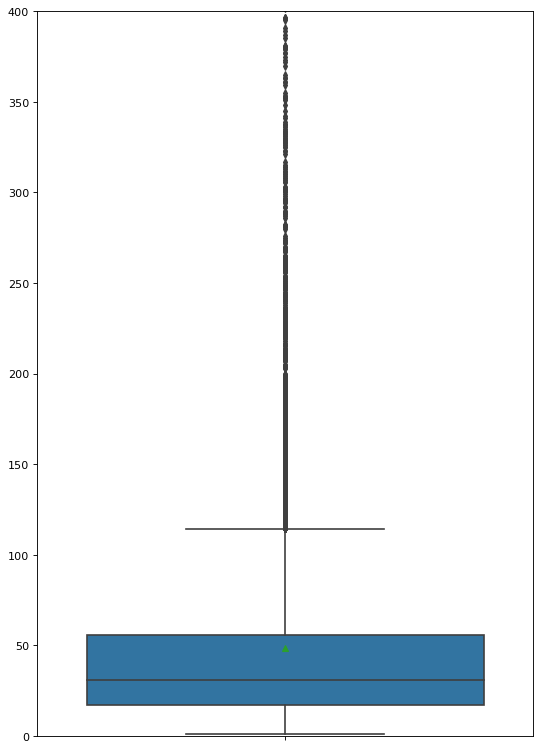

In [21]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,400)

*** distribution of length of the game against franction of the game ***

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

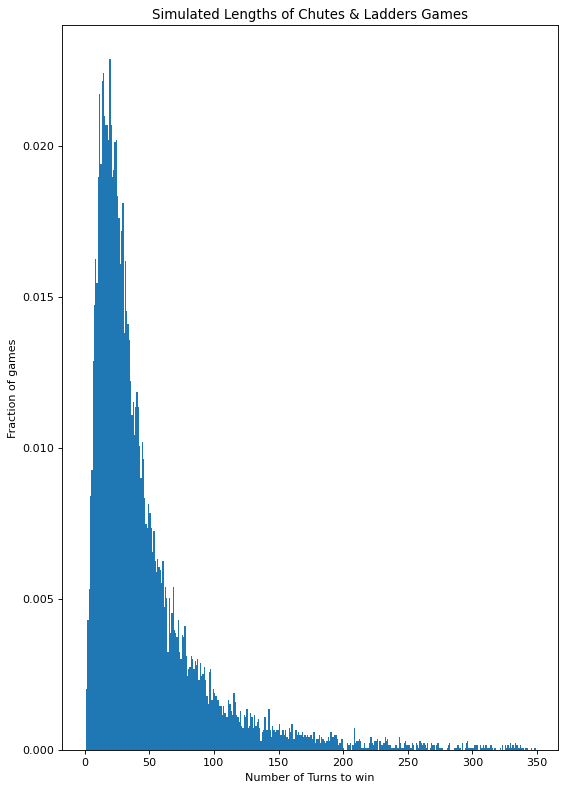

In [22]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range(350),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [23]:
acc=[]
for i in range(0,10):
    acc.append(average(NumberOfGame3(100)))
with open('avg_omly_game_random_snake', 'wb') as fp:
    pickle.dump(acc, fp)

In [24]:
avg=np.array(acc)

(30.0, 58.53)

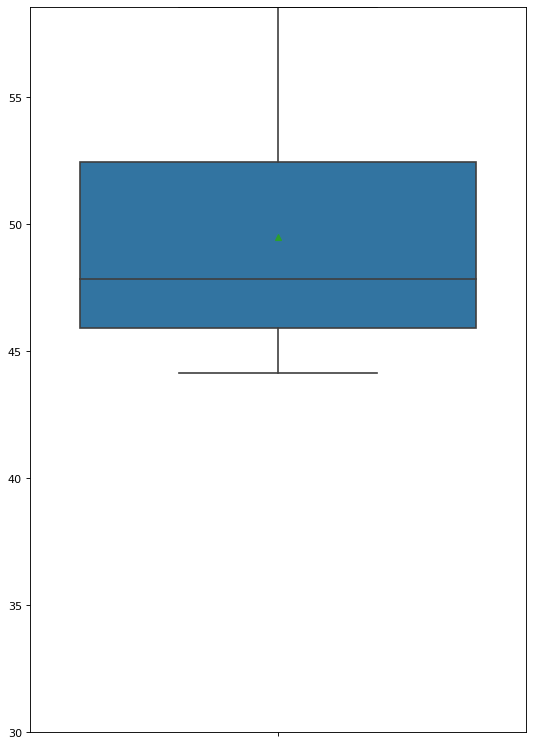

In [25]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(avg,orient="v",showmeans=True)
plt.ylim(30,(max(avg)))

Text(0.5, 1.0, 'Simulated average length of the game snakes and ladders with random snake and ladder')

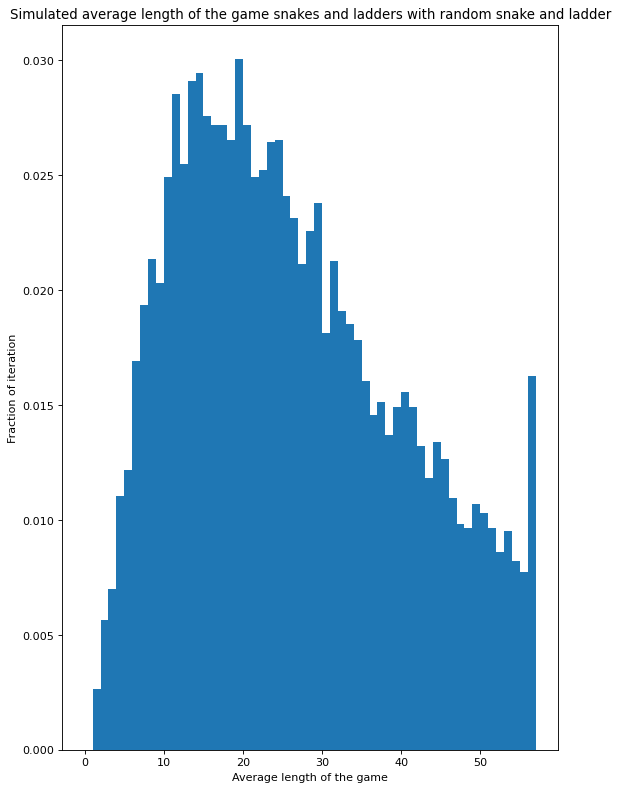

In [26]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range(int((max(avg)))),density=True)
plt.xlabel('Average length of the game')
plt.ylabel('Fraction of iteration')
plt.title('Simulated average length of the game snakes and ladders with random snake and ladder')

In [27]:
avg

array([58.53, 44.13, 48.52, 53.74, 48.32, 45.55, 46.82, 56.4 , 45.59,
       47.33])

*** saving average of average length of random snake and ladder ***

In [28]:
with open('avg_avg', 'wb') as fp:
    pickle.dump(acc, fp)

*** function to randomized original snake and ladders ***

In [29]:

def originalRandom():
    ladders = [[1, 38], [4, 14], [9, 31], [21, 42], [
        28, 84], [36, 44], [51, 67], [71, 91], [80, 100]]
    snakes = [[16, 6], [47, 26], [49, 11], [56, 53], [62, 19],
            [64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]
    ele1 = []
    ele2 = []
    ele3 = []
    ele4 = []
    for x in ladders:
        ele1.append(x[0])
        ele2.append(x[1])
    for x in snakes:
        ele3.append(x[0])
        ele4.append(x[1])
    random.shuffle(ele1)
    random.shuffle(ele2)
    random.shuffle(ele3)
    random.shuffle(ele4)
    la = list(more_itertools.zip_equal(ele1, ele2))
    sn = list(more_itertools.zip_equal(ele3, ele4))
    sl = [list(x) for x in la]
    sn = [list(x) for x in sn]
    for ele in sn:
        if ele[0] < ele[1]:
            ele[0], ele[1] = ele[1], ele[0]
    for ele in sl:
        if ele[0] > ele[1]:
            ele[0], ele[1] = ele[1], ele[0]
    return sn+sl

In [30]:
countlist=results(NumberOfGame2(100000,originalRandom))
with open('game_random_snake_og_se', 'wb') as fp:
    pickle.dump(countlist, fp)

The minimum lenght of the game is 1 
 the shortest path is [100]
The maximum lenght of the game is 1317 
 the longest path is [31, 35, 37, 40, 43, 45, 51, 57, 49, 51, 16, 22, 23, 24, 30, 32, 71, 76, 81, 82, 84, 88, 92, 26, 42, 45, 48, 52, 58, 61, 19, 20, 22, 42, 45, 50, 54, 55, 49, 16, 44, 45, 47, 50, 56, 58, 61, 66, 68, 56, 49, 50, 55, 56, 57, 59, 65, 67, 70, 64, 70, 76, 77, 91, 6, 11, 13, 17, 23, 25, 27, 33, 39, 41, 44, 45, 48, 49, 50, 51, 54, 55, 57, 63, 67, 68, 56, 19, 23, 26, 32, 35, 40, 43, 44, 45, 49, 50, 51, 56, 58, 64, 69, 70, 71, 77, 47, 51, 16, 20, 24, 25, 29, 30, 32, 37, 39, 44, 46, 47, 48, 16, 22, 24, 30, 35, 39, 41, 42, 46, 50, 55, 56, 59, 63, 69, 72, 77, 81, 86, 89, 91, 96, 26, 42, 44, 50, 51, 16, 17, 19, 22, 24, 25, 29, 33, 35, 40, 45, 46, 50, 16, 19, 22, 42, 43, 46, 50, 51, 57, 59, 65, 70, 71, 77, 47, 51, 54, 56, 19, 24, 29, 34, 39, 44, 48, 52, 16, 20, 44, 50, 16, 20, 25, 42, 44, 49, 16, 20, 24, 30, 34, 37, 71, 72, 77, 91, 11, 13, 51, 52, 55, 57, 59, 19, 24, 42, 45, 51

In [31]:
countList=np.array(countlist)
countList=countList[:,:-1].reshape(100000,)

*** plot box ***

(0.0, 400.0)

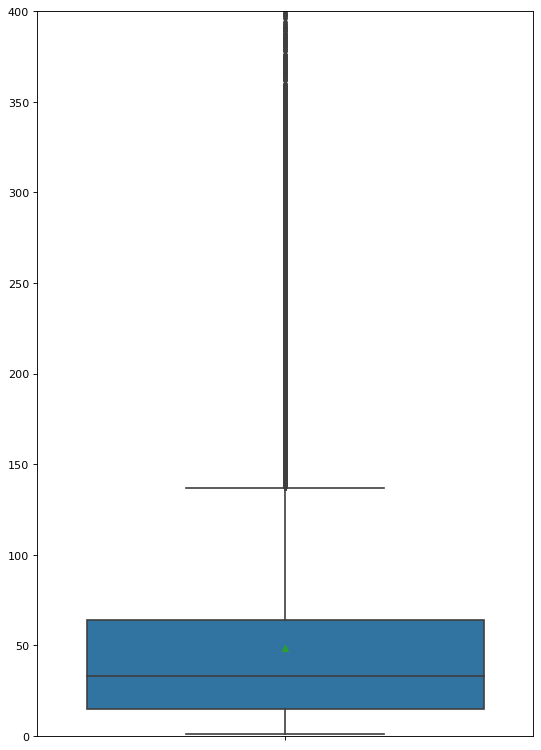

In [32]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,400)

*** distribution ***

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

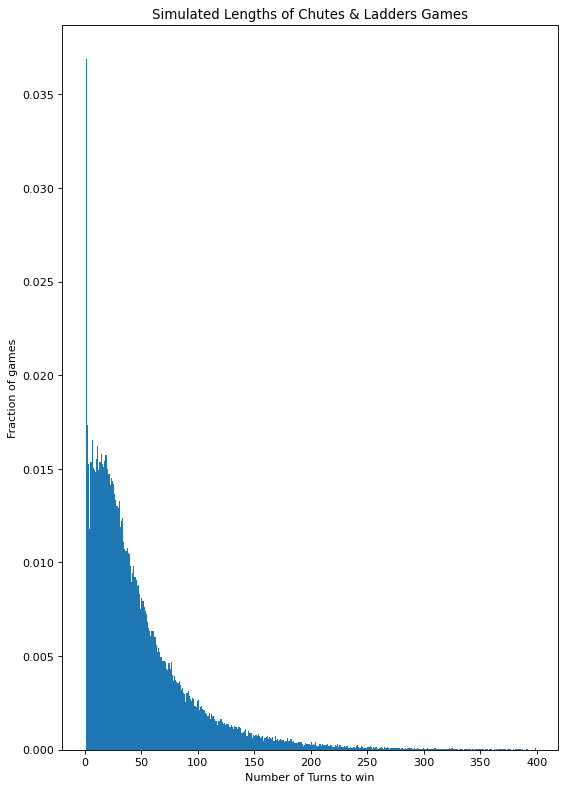

In [33]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range(400),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')